### **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
import os
import warnings
warnings.filterwarnings('ignore')

### **Reading the Dataset**

In [ ]:
df= pd.read_csv('/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### **Data Exploration**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.rename(index=str, columns={"Annual Income (k$)": "A_Income", "Spending Score (1-100)": "Score"}, inplace= True)
print(df)

     CustomerID  Gender  Age  A_Income  Score
0             1    Male   19        15     39
1             2    Male   21        15     81
2             3  Female   20        16      6
3             4  Female   23        16     77
4             5  Female   31        17     40
..          ...     ...  ...       ...    ...
195         196  Female   35       120     79
196         197  Female   45       126     28
197         198    Male   32       126     74
198         199    Male   32       137     18
199         200    Male   30       137     83

[200 rows x 5 columns]


In [ ]:
new_data = df.drop(['CustomerID','Gender'], axis=1)

In [ ]:

new_data.head()

,Age,A_Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
df.describe()

,CustomerID,Age,A_Income,Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Figure size 800x600 with 0 Axes>

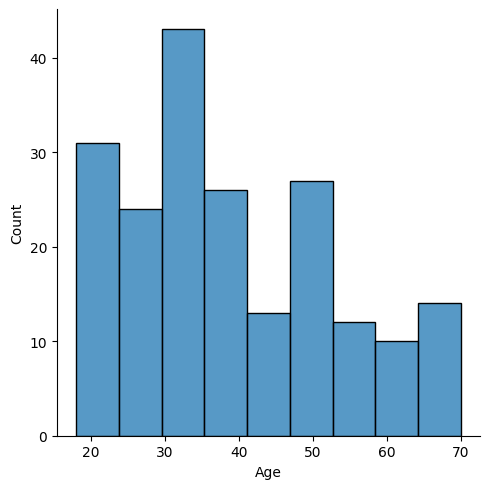

In [ ]:
plt.figure(figsize=(8, 6))
sns.displot(df["Age"])
plt.xlabel("Age")
plt.show()

### **KMeans with 1 Cluster**

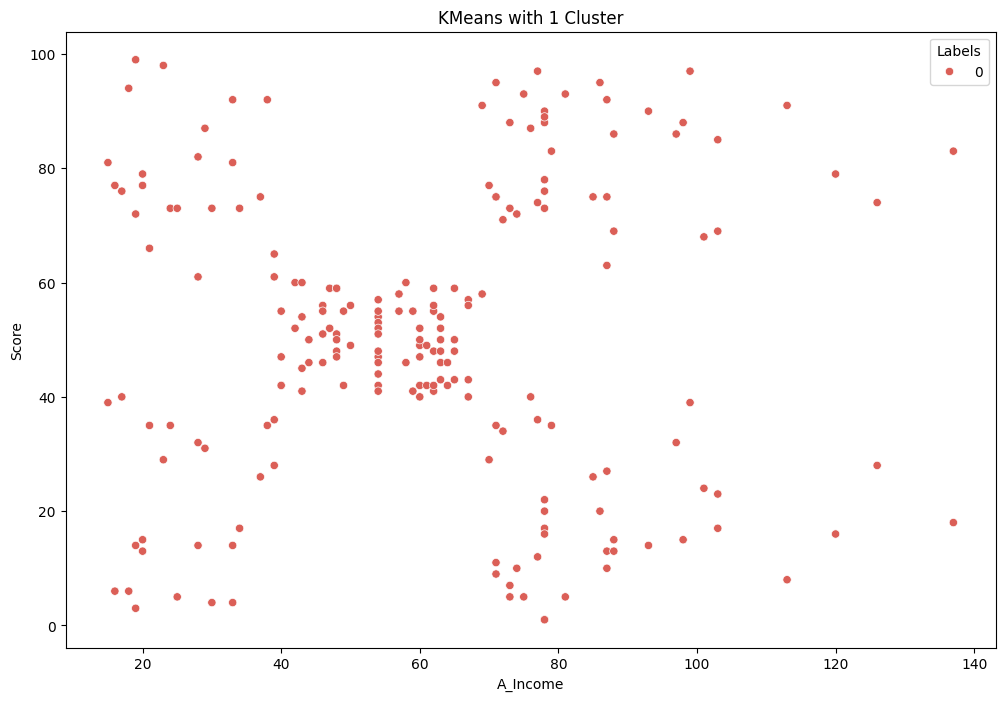

In [ ]:
km1 =KMeans(n_clusters = 1).fit(new_data)

new_data['Labels'] =km1.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x= new_data['A_Income'], y = new_data['Score'], hue=new_data['Labels'],
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 1 Cluster')
plt.show()

### **KMeans with 3 Clusters**

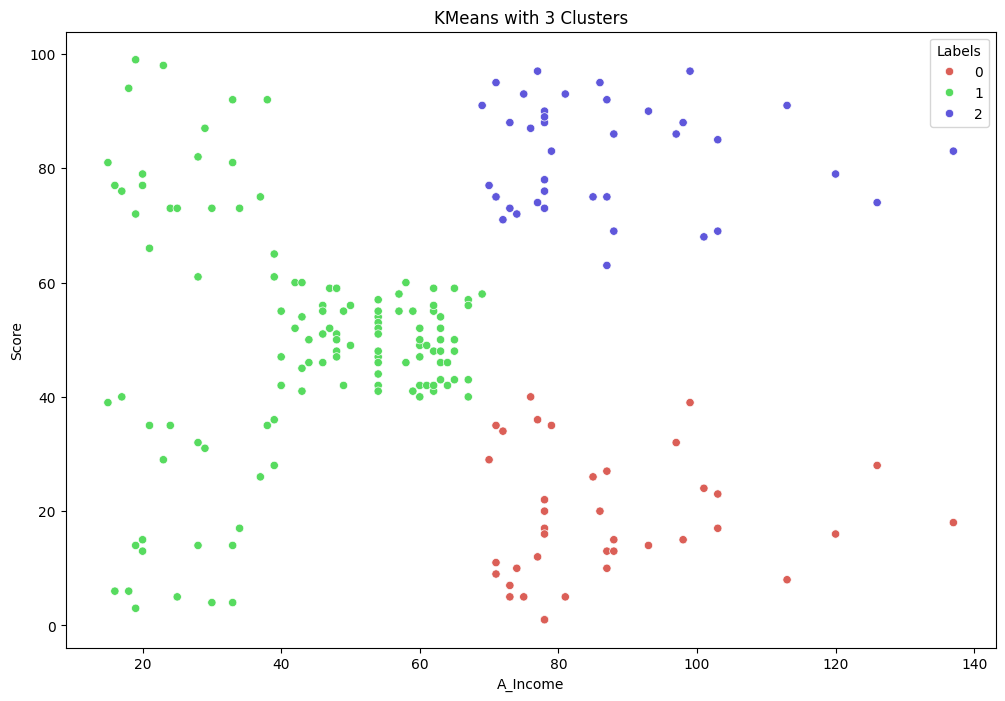

In [ ]:
km3 =KMeans(n_clusters = 3).fit(new_data)

new_data['Labels'] =km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x= new_data['A_Income'], y = new_data['Score'], hue=new_data['Labels'],
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

### **KMeans with 5 Clusters**

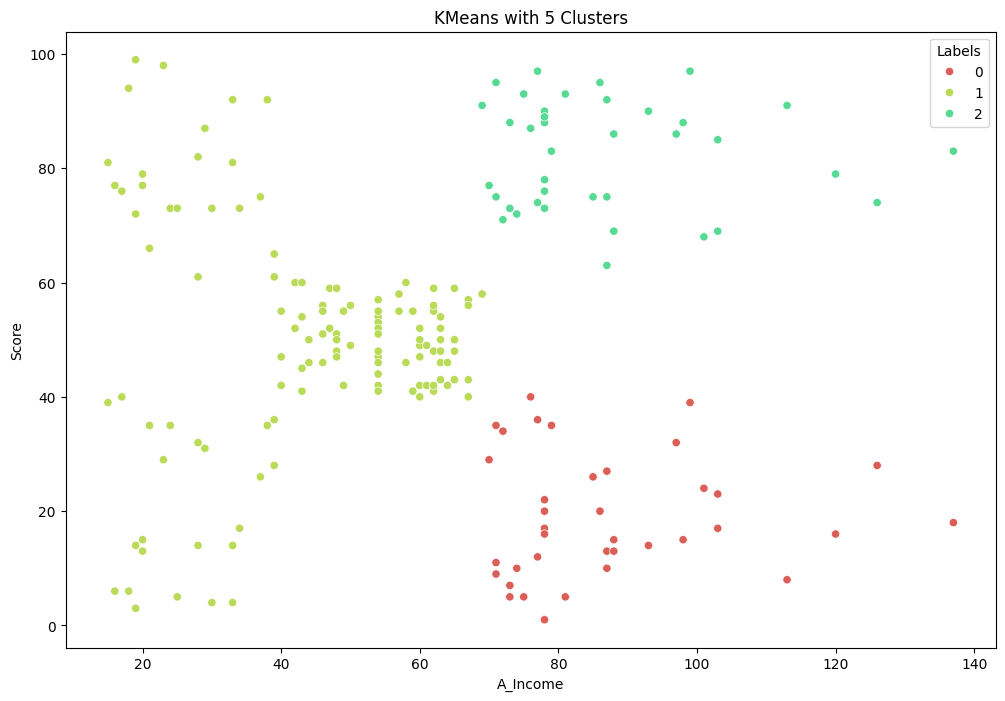

In [ ]:
km5 =KMeans(n_clusters = 5).fit(new_data)

new_data['Labels'] =km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x= new_data['A_Income'], y = new_data['Score'], hue=new_data['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

### **Bar Chart Plot of Annual Income**

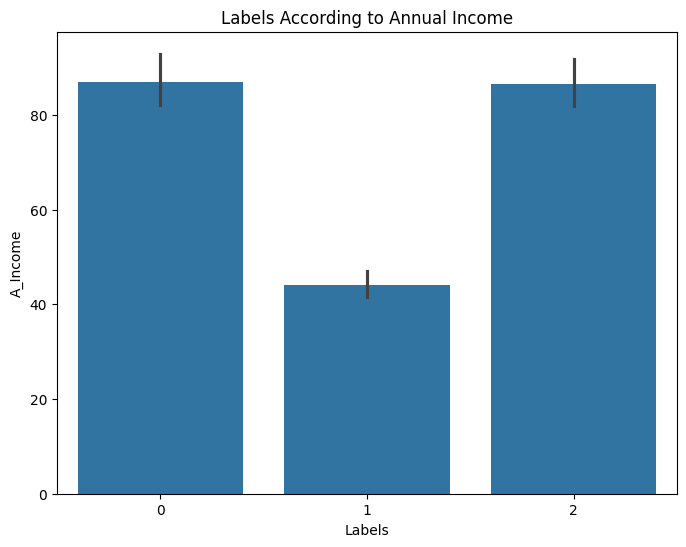

In [ ]:
fig, axes= plt.subplots(figsize=(8,6))
sns.barplot(x='Labels', y='A_Income', data=new_data)
axes.set_title("Labels According to Annual Income")
plt.show()

### **Bar Chart Plot of Scoring History**

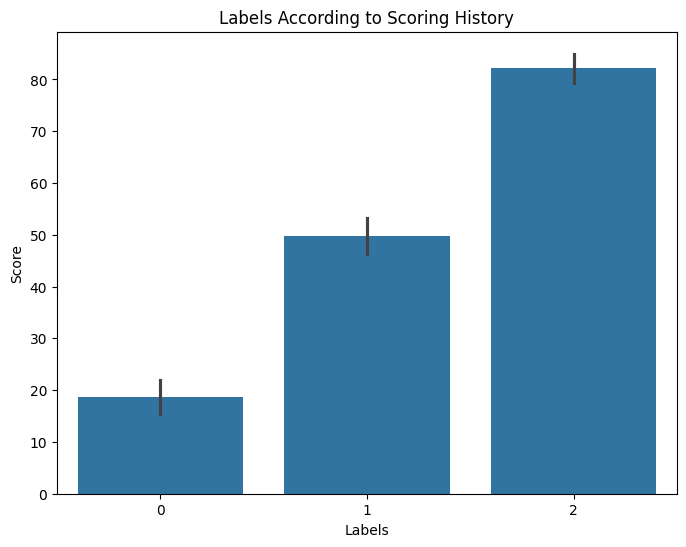

In [ ]:
fig, axes= plt.subplots(figsize=(8,6))

sns.barplot(x='Labels', y='Score', data=new_data)
axes.set_title("Labels According to Scoring History")

plt.show()

### **Clustering using KMeans**

### **Segementation Using Age and Spending Score**

In [ ]:
X1 = df[['Age' , 'Score']].iloc[: , :].values
inertia = []
for n in range(1, 11):
  algorithm= (KMeans(n_clusters = n ,init='k-means++', n_init=10 ,max_iter=100,
                     tol=0.0001, random_state= 111 , algorithm='elkan'))
  algorithm.fit(X1)
  inertia.append(algorithm.inertia_)

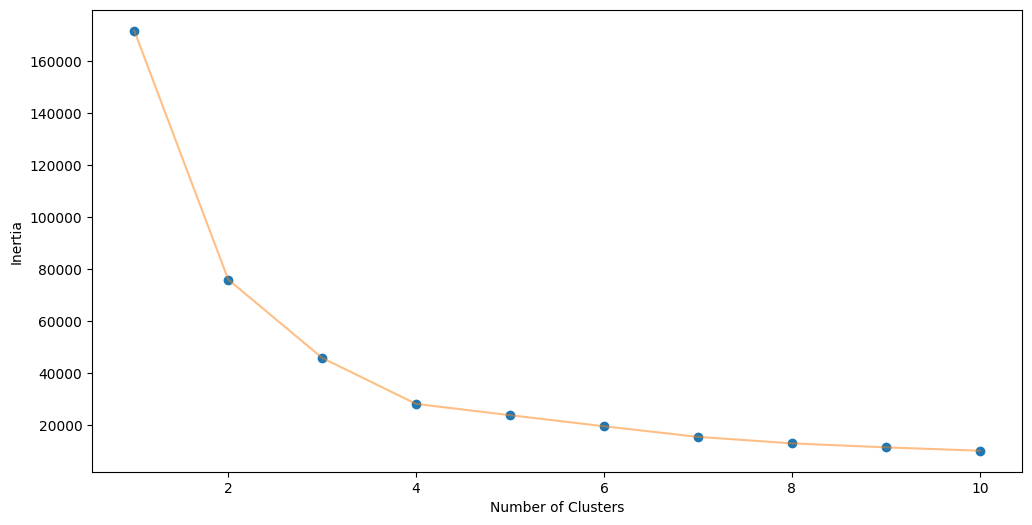

In [ ]:
plt.figure(1, figsize = (12,6))
plt.plot(np.arange(1, 11), inertia , 'o')
plt.plot(np.arange(1, 11), inertia , '-', alpha = 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()



### **Segmenation Using Annual Income and Spending Score**

In [ ]:
X2 = df[['A_Income' , 'Score']].iloc[: , :].values
inertia = []
for n in range(1, 11):
  algorithm= (KMeans(n_clusters = n ,init='k-means++', n_init=10 ,max_iter=100,
                     tol=0.0001, random_state= 111 , algorithm='elkan'))
  algorithm.fit(X2)
  inertia.append(algorithm.inertia_)

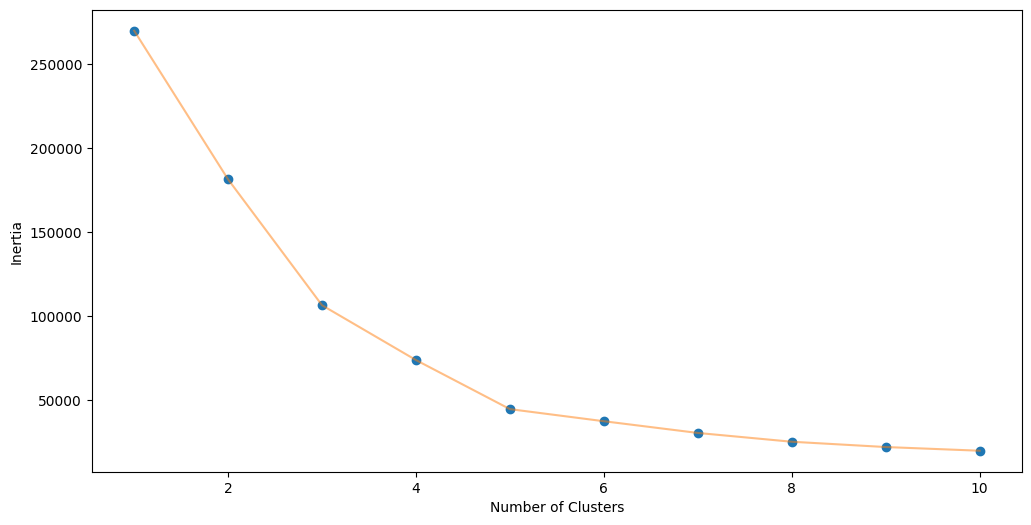

In [ ]:
plt.figure(1, figsize = (12,6))
plt.plot(np.arange(1, 11), inertia , 'o')
plt.plot(np.arange(1, 11), inertia , '-', alpha = 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()